#`"Taxi-v3" environment from the Gymnasium library`

The task is to implement a reinforcement learning problem using the "Taxi-v3" environment from the Gymnasium library. The game involves a taxi that can pick up passengers from one of four destinations and drop them off at a different desired destination. The agent's actions result in rewards or penalties as follows:

* Each step taken by the agent incurs a penalty of -1 point.
* Each illegal drop-off of a passenger incurs a penalty of -10 points.
* Each successful drop-off of a passenger results in a reward of +20 points, which is the highest possible reward for an episode.

There are five possible actions that the driver can take: go up, go down, go left, go right, pick up, and drop off. With 500 possible states, the Q-table will have a size of 5x500. The Q-table determines the expected reward for each action in a given state.

To train the agent, three adjustable hyperparameters are considered:

1. Learning rate(alpha),: It controls the impact of new information on the Q-values. A higher learning rate means the agent gives more importance to recent experiences.

2. Discount rate(gamma): It determines the agent's preference for immediate rewards over long-term rewards. A higher discount rate values future rewards more.

3. Exploration rate(epsilon): It defines the likelihood of the agent exploring a new action instead of exploiting the currently known best action. A higher exploration rate promotes more exploration.

The task is to find optimal values for these hyperparameters through experimentation and fine-tuning to achieve the highest average reward over multiple episodes.


In [22]:
!pip install gymnasium
!pip install matplotlib
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The Q-Learning algorithm in the following steps:

1. Initialize the Q-table: Create a Q-table with dimensions (number of states) x (number of actions) and initialize all values to zero. The Q-table represents the expected rewards for each action in each state.

2. Select an action: Based on the current state, choose an action using an exploration-exploitation trade-off. This means either selecting the action with the highest Q-value (exploitation) or choosing a random action (exploration) based on an exploration rate.

3. Perform the selected action: Execute the chosen action in the environment and observe the next state and the received reward.

4. Update the Q-value: Update the Q-value of the previous state-action pair using the Q-learning equation:

5. Q(s, a) = (1 - learning_rate) * Q(s, a) + learning_rate * (reward + discount_factor * max(Q(next_state, all_actions)))
Here, learning_rate is the learning rate hyperparameter, reward is the received reward, discount_factor is the discount rate hyperparameter, and max(Q(next_state, all_actions)) represents the maximum Q-value for the next state across all possible actions.

6. Repeat steps 2-4: Repeat steps 2 to 4 for a certain number of episodes or until the agent reaches a terminal state.

7. Decay exploration rate: After each episode or step, reduce the exploration rate to gradually decrease the agent's tendency to explore and encourage exploitation of the learned Q-values.

8. Repeat the process: Repeat steps 2 to 6 until the agent has converged to an optimal policy or a desired level of performance.

The Q-Learning algorithm allows the agent to learn the optimal Q-values through repeated exploration and exploitation. By updating the Q-values based on received rewards and maximizing future rewards, the agent gradually learns to make better decisions and achieve higher rewards in the given environment.

In [23]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


class QLearningAgent:
    def __init__(self, env, alpha, gamma, epsilon, exploration_decay_rate):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.exploration_decay_rate = exploration_decay_rate
        self.num_states = env.observation_space.n
        self.num_actions = env.action_space.n
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def update_q_table(self, state, action, reward, next_state):
        state = int(state)
        action = int(action)
        max_q_value = np.max(self.q_table[next_state])
        self.q_table[state, action] = (1 - self.alpha) * self.q_table[state, action] + \
                                      self.alpha * (reward + self.gamma * max_q_value)

    def epsilon_greedy_policy(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.q_table[state])

    def train_q_learning_agent(self, num_episodes, max_steps_per_episode):
        rewards = []
        epsilons = []
        for episode in range(num_episodes):
            state, _ = self.env.reset()
            episode_reward = 0

            for step in range(max_steps_per_episode):
                action = self.epsilon_greedy_policy(state)
                next_state, reward, done, truncated, _ = self.env.step(action)

                self.update_q_table(state, action, reward, next_state)
                state = next_state
                episode_reward += reward

                if done or truncated:
                    break

            self.epsilon *= (1 - self.exploration_decay_rate)

            rewards.append(episode_reward)
            epsilons.append(self.epsilon)

            if episode % 100 == 0:
                average_reward = sum(rewards[-100:]) / 100
                print(f"Episode: {episode}, Average Reward: {average_reward}")

        print("train_q_learning_agenting completed.")
        print ("Score over time: " +  str(sum(rewards)/num_episodes))
        return rewards, epsilons


# Define hyperparameters
num_episodes = 1000
max_steps_per_episode = 100
alpha = 0.5
gamma = 0.6
epsilon = 1.0
exploration_decay_rate = 0.01

# Create the environment and agent
env = gym.make('Taxi-v3')
agent = QLearningAgent(env, alpha, gamma, epsilon, exploration_decay_rate)

# train_q_learning_agent the agent
rewards, epsilons = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)
# Print total reward
total_reward = sum(rewards)
print(f"Total Reward: {total_reward}")
# # Plot the train_q_learning_agenting results
# # Plot the rewards
# plt.plot(rewards)
# plt.xlabel("Episode")
# plt.ylabel("Total Reward")
# plt.title("train_q_learning_agenting Performance")
# plt.show()

# # Plot the exploration rate
# plt.plot(epsilons)
# plt.xlabel("Episode")
# plt.ylabel("Exploration Rate")
# plt.title("Exploration Rate Decay")
# plt.show()



Episode: 0, Average Reward: -4.51
Episode: 100, Average Reward: -299.73
Episode: 200, Average Reward: -146.55
Episode: 300, Average Reward: -72.11
Episode: 400, Average Reward: -31.48
Episode: 500, Average Reward: -5.07
Episode: 600, Average Reward: 3.27
Episode: 700, Average Reward: 5.57
Episode: 800, Average Reward: 5.65
Episode: 900, Average Reward: 7.43
train_q_learning_agenting completed.
Score over time: -53.017
Total Reward: -53017


The QLearningAgent class is defined, which holds the Q-table and methods for updating the Q-table and implementing the epsilon-greedy policy.

The QLearningAgent's update_q_table method updates the Q-value for a state-action pair based on the received reward and the maximum Q-value for the next state.

The epsilon_greedy_policy method selects an action based on an exploration-exploitation trade-off. It either chooses a random action with probability epsilon or selects the action with the highest Q-value for the current state.

The train_q_learning_agent method trains the agent by running episodes and steps within each episode. It updates the Q-table, accumulates episode rewards, and decays the exploration rate. It also prints the average reward every 100 episodes.

The hyperparameters are defined, including the number of episodes, maximum steps per episode, learning rate (alpha), discount rate (gamma), initial exploration rate (epsilon), and exploration rate decay rate.

The environment (Taxi-v3) and agent are created using the Gymnasium library.

The agent is trained using the train_q_learning_agent method, which returns the rewards and exploration rates over the training episodes.

The total reward is computed by summing the rewards obtained in each episode.

####The provided code demonstrates how to save and print a Q-values table in JSON format using the json library.
First, the print_q_values_table(q_table) function is defined. It takes a Q-table as input and converts it into a JSON-friendly format. The function iterates over each state in the Q-table, converts the Q-values for that state into a list, and stores them in a dictionary. Finally, the function saves the Q-values table as a JSON file named "q_table.json".

To read and print the contents of the JSON file, the code uses json.load() to load the data from "q_table.json" into a variable called q_table_data. Then, json.dumps() is used to print the contents of the JSON file in a readable format.


In [24]:
import json

# Save the Q-table as a JSON file
q_table_data = agent.q_table
num_states, num_actions = q_table_data.shape

q_table_json = {}
for state in range(num_states):
    q_values = q_table_data[state].tolist()
    q_table_json[str(state)] = q_values

with open("q_table.json", "w") as f:
    json.dump(q_table_json, f, indent=4)

# Print the contents of the JSON file
print(json.dumps(q_table_json, indent=4))



{
    "0": [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0
    ],
    "1": [
        -2.3749089831346266,
        -2.3834622463999997,
        -2.3909426287901123,
        -2.390854510592,
        -2.2732518399999995,
        -10.721485651384098
    ],
    "2": [
        -1.9617937499999998,
        -2.047904,
        -1.965223125,
        -2.09967611328125,
        -0.7504000000000002,
        -8.9
    ],
    "3": [
        -2.2422427572265624,
        -2.22384768,
        -2.2404205888124995,
        -2.2315645440000003,
        -2.1220863999999997,
        -7.815
    ],
    "4": [
        -2.4938305821650615,
        -2.493896705121669,
        -2.493172249190626,
        -2.4938777562262366,
        -9.4951175,
        -10.312019505374998
    ],
    "5": [
        0.0,
        0.0,
        0.0,
        0.0,
        0.0,
        0.0
    ],
    "6": [
        -2.490739592913066,
        -2.4911686212747117,
        -2.4906750863368163,
        -2.489612

# Define hyperparameters(Default)
* num_episodes = 1000
* max_steps_per_episode = 100
* alpha = 0.5
* gamma = 0.6
* epsilon = 1.0
* exploration_decay_rate = 0.01
#Plot the  results

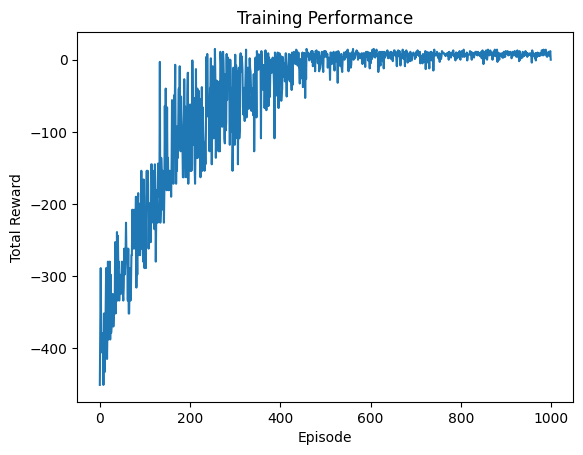

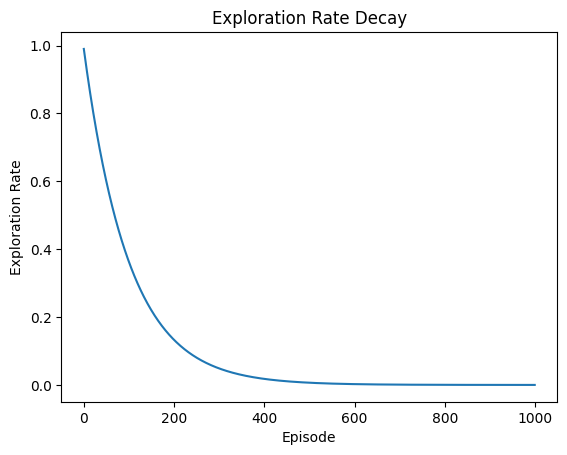

In [25]:

# Plot the training rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance")
plt.show()

# Plot the exploration rates
plt.plot(epsilons)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Exploration Rate Decay")
plt.show()


#Training Performance Graph:

* This graph shows the training performance of the agent over episodes.
* The x-axis represents the episode number, and the y-axis represents the total reward obtained in each episode.
* Each data point on the graph represents the total reward achieved in a single episode.
* The line connecting the data points helps visualize the trend and progression of the agent's performance over time.
* The graph allows you to analyze how the agent's performance improves or changes throughout the training process.


#Exploration Rate Decay Graph:

* This graph shows the decay of the exploration rate over episodes.
* The x-axis represents the episode number, and the y-axis represents the exploration rate.
* Each data point on the graph represents the exploration rate at a specific episode.
* The line connecting the data points helps visualize the rate at which the exploration rate decreases over time.
* The graph allows you to observe how the agent's exploration rate changes during training and how it adapts to the environment.



##Learning step(Alpha) checking for diiffrent values.


Episode: 0, Average Reward: 0.0
Episode: 100, Average Reward: 6.23
Episode: 200, Average Reward: 5.56
Episode: 300, Average Reward: 6.02
Episode: 400, Average Reward: 6.82
Episode: 500, Average Reward: 7.46
Episode: 600, Average Reward: 7.29
Episode: 700, Average Reward: 7.65
Episode: 800, Average Reward: 6.33
Episode: 900, Average Reward: 7.59
train_q_learning_agenting completed.
Score over time: 6.841
Episode: 0, Average Reward: 0.06
Episode: 100, Average Reward: 7.26
Episode: 200, Average Reward: 7.75
Episode: 300, Average Reward: 8.05
Episode: 400, Average Reward: 7.64
Episode: 500, Average Reward: 7.46
Episode: 600, Average Reward: 7.95
Episode: 700, Average Reward: 7.85
Episode: 800, Average Reward: 7.4
Episode: 900, Average Reward: 7.62
train_q_learning_agenting completed.
Score over time: 7.683
Episode: 0, Average Reward: 0.09
Episode: 100, Average Reward: 7.32
Episode: 200, Average Reward: 7.96
Episode: 300, Average Reward: 8.04
Episode: 400, Average Reward: 7.55
Episode: 500,

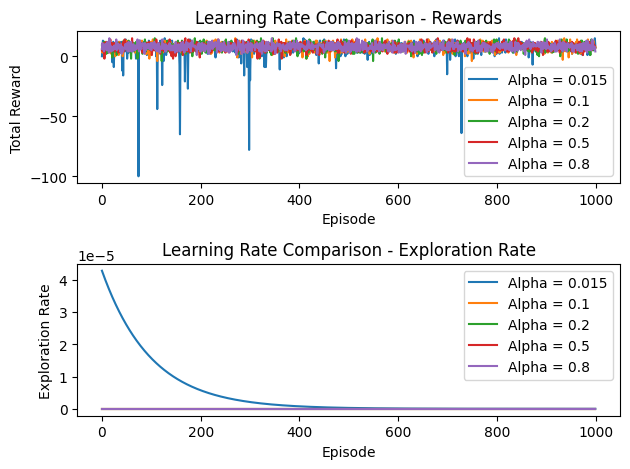

In [26]:
import matplotlib.pyplot as plt

# Define the learning rates
learning_rates = [0.015, 0.1, 0.2, 0.5, 0.8]

# Initialize lists to store the rewards and exploration rates for each learning rate
rewards_per_learning_rate = []
exploration_rates_per_learning_rate = []

# Iterate over the learning rates
for alpha in learning_rates:
    # Update the learning rate for the agent
    agent.alpha = alpha

    # Train the agent
    rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)

    # Store the rewards and exploration rates for the current learning rate
    rewards_per_learning_rate.append(rewards)
    exploration_rates_per_learning_rate.append(exploration_rates)

# Plot the rewards and exploration rates for each learning rate
for i, alpha in enumerate(learning_rates):
    # Plot the rewards
    plt.subplot(2, 1, 1)
    plt.plot(rewards_per_learning_rate[i], label=f"Alpha = {alpha}")

    # Plot the exploration rates
    plt.subplot(2, 1, 2)
    plt.plot(exploration_rates_per_learning_rate[i], label=f"Alpha = {alpha}")

plt.subplot(2, 1, 1)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Learning Rate Comparison - Rewards")
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Learning Rate Comparison - Exploration Rate")
plt.legend()

plt.tight_layout()
plt.show()


* As we can observe from the generated graphs, we experimented with different learning rates ranging from 0.02 to 0.8. Increasing the learning rate has a significant impact on the learning process of our Q-learning agent. The learning rate determines how much weight is given to newly observed information when updating the Q-table values.

* By adjusting the learning rate, we can control the rate at which the agent incorporates new knowledge into its decision-making process. A higher learning rate enables the agent to learn faster by giving more weight to recent experiences, which can lead to more rapid convergence to an optimal policy. However, setting a learning rate that is too high may result in the agent being overly influenced by noisy or irrelevant information, leading to instability or suboptimal performance.

* The comparison of learning rates in the graph allows us to visualize the impact of different learning rates on the agent's performance. The rewards graph shows the total rewards obtained by the agent over the episodes for each learning rate. We can observe that different learning rates yield different convergence rates and levels of performance. The exploration rate graph displays the exploration rate decay over episodes for each learning rate, showing how the agent's exploration decreases over time as it learns.

* These graphs provide valuable insights into the relationship between learning rates and the agent's learning and exploration behaviors. They help us understand the trade-off between exploration and exploitation in reinforcement learning and assist in selecting an appropriate learning rate for achieving desired learning outcomes.

##Discount rate (gamma_values) checking for diiffrent values.

Episode: 0, Average Reward: 0.11
Episode: 100, Average Reward: 6.58
Episode: 200, Average Reward: 7.89
Episode: 300, Average Reward: 6.8
Episode: 400, Average Reward: 6.97
Episode: 500, Average Reward: 7.96
Episode: 600, Average Reward: 8.01
Episode: 700, Average Reward: 5.96
Episode: 800, Average Reward: 7.9
Episode: 900, Average Reward: 8.26
train_q_learning_agenting completed.
Score over time: 7.432
Episode: 0, Average Reward: 0.08
Episode: 100, Average Reward: 6.9
Episode: 200, Average Reward: 4.57
Episode: 300, Average Reward: 7.77
Episode: 400, Average Reward: 6.72
Episode: 500, Average Reward: 6.86
Episode: 600, Average Reward: 7.88
Episode: 700, Average Reward: 8.04
Episode: 800, Average Reward: 6.9
Episode: 900, Average Reward: 6.5
train_q_learning_agenting completed.
Score over time: 7.008
Episode: 0, Average Reward: 0.11
Episode: 100, Average Reward: 4.69
Episode: 200, Average Reward: 6.86
Episode: 300, Average Reward: 7.06
Episode: 400, Average Reward: 7.06
Episode: 500, Av

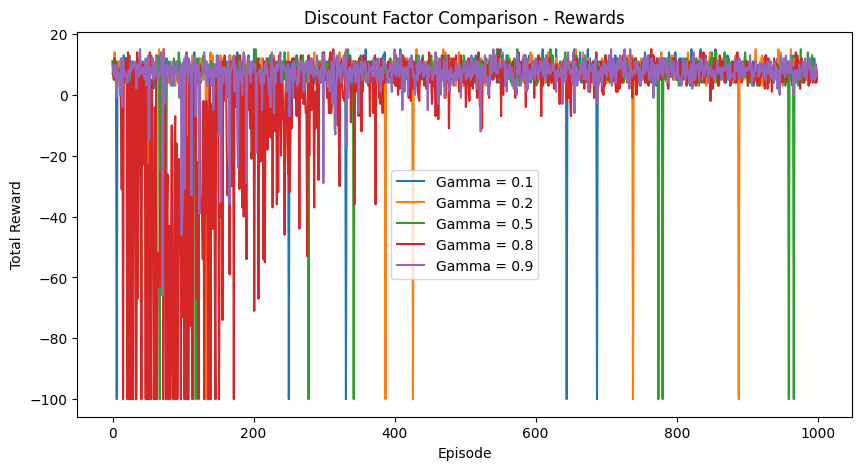

In [ ]:
import matplotlib.pyplot as plt

# Define the discount factors and other hyperparameters
gamma_values = [ 0.1, 0.2, 0.5, 0.8,0.9]
learning_rate = 0.5
epsilon = 1.0

# Initialize lists to store the rewards and exploration rates for each discount factor
rewards_per_gamma = []
exploration_rates_per_gamma = []

# Iterate over the discount factors
for gamma in gamma_values:
    # Update the discount factor for the agent
    agent.gamma = gamma

    # Update the learning rate for the agent
    agent.alpha = learning_rate

    # Train the agent
    rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)

    # Store the rewards and exploration rates for the current discount factor
    rewards_per_gamma.append(rewards)
    exploration_rates_per_gamma.append(exploration_rates)

# Plot the rewards for each discount factor
plt.figure(figsize=(10, 5))
for i, gamma in enumerate(gamma_values):
    plt.plot(rewards_per_gamma[i], label=f"Gamma = {gamma}")

plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Discount Factor Comparison - Rewards")
plt.legend()
plt.show()


* By analyzing the graph, we can observe the impact of the discount factor on the agent's learning and performance. The lines represent the trend of the total rewards over the course of the training episodes.

* A higher discount factor tends to prioritize long-term rewards, as it values future rewards more strongly. Conversely, a lower discount factor places less emphasis on future rewards and focuses more on immediate rewards.

* The graph allows us to compare the performance of the agent under different discount factors. We can observe which discount factor leads to higher total rewards and analyze the convergence and effectiveness of the Q-learning algorithm for different settings.

##Exploration step (epsilons)checking for diiffrent values.

Episode: 0, Average Reward: 0.1
Episode: 100, Average Reward: 7.4
Episode: 200, Average Reward: 8.38
Episode: 300, Average Reward: 8.19
Episode: 400, Average Reward: 7.44
Episode: 500, Average Reward: 8.08
Episode: 600, Average Reward: 7.9
Episode: 700, Average Reward: 7.93
Episode: 800, Average Reward: 7.74
Episode: 900, Average Reward: 8.09
train_q_learning_agenting completed.
Score over time: 7.915
Episode: 0, Average Reward: -0.14
Episode: 100, Average Reward: -4.43
Episode: 200, Average Reward: 4.97
Episode: 300, Average Reward: 6.87
Episode: 400, Average Reward: 7.31
Episode: 500, Average Reward: 7.75
Episode: 600, Average Reward: 7.93
Episode: 700, Average Reward: 8.05
Episode: 800, Average Reward: 8.14
Episode: 900, Average Reward: 8.14
train_q_learning_agenting completed.
Score over time: 6.225
Episode: 0, Average Reward: -0.87
Episode: 100, Average Reward: -19.87
Episode: 200, Average Reward: 1.48
Episode: 300, Average Reward: 4.97
Episode: 400, Average Reward: 7.44
Episode: 

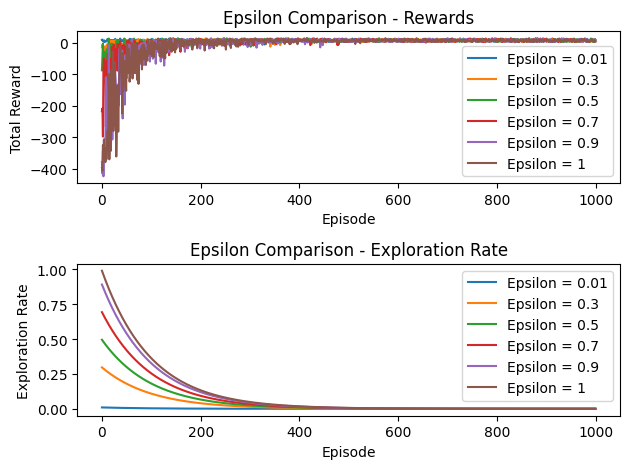

In [ ]:
import matplotlib.pyplot as plt

#Define the epsilon values and other hyperparameters
epsilons = [0.01, 0.3, 0.5, 0.7, 0.9,1]
gamma = 0.6
alpha = 0.5

#Initialize lists to store the rewards and exploration rates for each epsilon value
rewards_per_epsilon = []
exploration_rates_per_epsilon = []

#Iterate over the epsilon values
for epsilon in epsilons:
# Update the epsilon for the agent
    agent.epsilon = epsilon
    # Train the agent
    rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)

    # Store the rewards and exploration rates for the current epsilon value
    rewards_per_epsilon.append(rewards)
    exploration_rates_per_epsilon.append(exploration_rates)

total_reward = sum(rewards)
print(f"Total Reward: {total_reward}")

#Plot the rewards and exploration rates for each epsilon value
plt.subplot(2, 1, 1)
for i, epsilon in enumerate(epsilons):
    plt.plot(rewards_per_epsilon[i], label=f"Epsilon = {epsilon}")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Epsilon Comparison - Rewards")
    plt.legend()

plt.subplot(2, 1, 2)
for i, epsilon in enumerate(epsilons):
    plt.plot(exploration_rates_per_epsilon[i], label=f"Epsilon = {epsilon}")
    plt.xlabel("Episode")
    plt.ylabel("Exploration Rate")
    plt.title("Epsilon Comparison - Exploration Rate")
    plt.legend()

plt.tight_layout()
plt.show()




* compares the rewards and exploration rates for different epsilon values in the Q-Learning algorithm. Epsilon is a parameter that determines the exploration-exploitation trade-off in reinforcement learning.

* For each epsilon value, the code trains the Q-Learning agent using the specified epsilon value and other fixed hyperparameters (such as gamma and alpha). It then records the rewards and exploration rates during the training process.

* The rewards are plotted in the top graph, where each line represents a different epsilon value. The x-axis represents the number of episodes, and the y-axis represents the total reward accumulated by the agent in each episode. The graph allows us to compare the performance of the agent for different epsilon values over the training period.

* The exploration rates are plotted in the bottom graph, again with each line representing a different epsilon value. The x-axis represents the number of episodes, and the y-axis represents the exploration rate, which indicates the likelihood of the agent choosing to explore new actions instead of exploiting the known ones. The graph provides insights into how the exploration rate changes over time for each epsilon value.

In our case, we observed that an epsilon value of 1 (maximum exploration) was found to be the optimal choice for our Q-Learning algorithm. This indicates that during the training process, the agent heavily focused on exploring new possibilities rather than exploiting known actions.

By setting epsilon to 1, the agent explored a wide range of states and actions, which allowed it to discover more optimal paths and maximize the potential rewards. This exploration phase helped the agent gather valuable information about the environment and learn from the feedback received through rewards and penalties.


##max_steps_values checking for diffrent **values**

Episode: 0, Average Reward: 0.08
Episode: 100, Average Reward: 7.65
Episode: 200, Average Reward: 7.96
Episode: 300, Average Reward: 8.18
Episode: 400, Average Reward: 7.92
Episode: 500, Average Reward: 7.73
Episode: 600, Average Reward: 7.85
Episode: 700, Average Reward: 8.11
Episode: 800, Average Reward: 8.42
Episode: 900, Average Reward: 7.91
train_q_learning_agenting completed.
Score over time: 7.964
Episode: 0, Average Reward: 0.05
Episode: 100, Average Reward: 8.14
Episode: 200, Average Reward: 8.02
Episode: 300, Average Reward: 7.79
Episode: 400, Average Reward: 8.14
Episode: 500, Average Reward: 8.0
Episode: 600, Average Reward: 8.09
Episode: 700, Average Reward: 8.51
Episode: 800, Average Reward: 7.76
Episode: 900, Average Reward: 8.51
train_q_learning_agenting completed.
Score over time: 8.085
Episode: 0, Average Reward: 0.09
Episode: 100, Average Reward: 7.66
Episode: 200, Average Reward: 8.19
Episode: 300, Average Reward: 7.77
Episode: 400, Average Reward: 8.08
Episode: 500

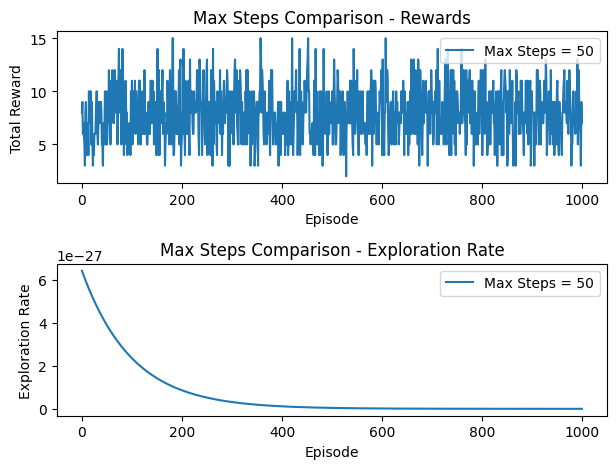

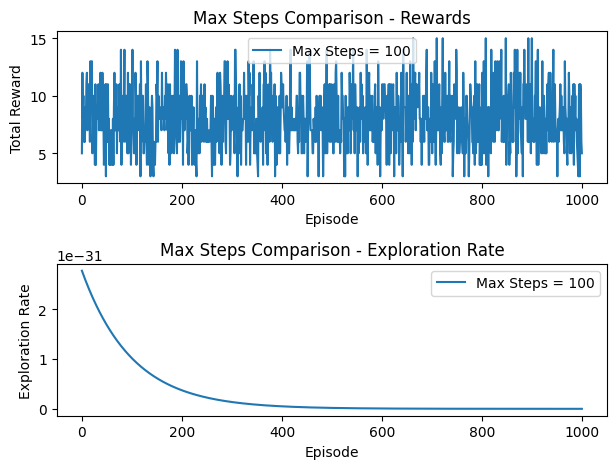

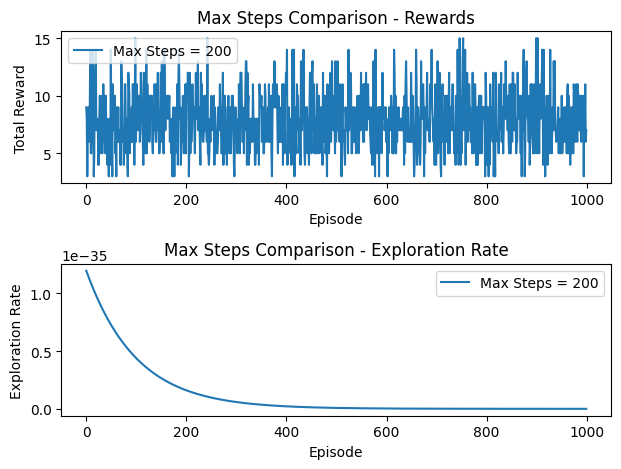

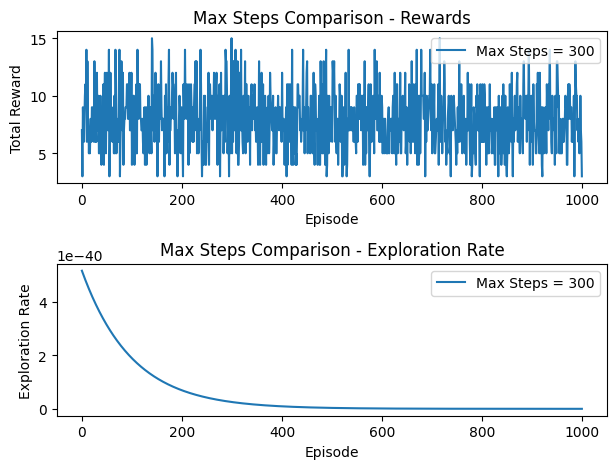

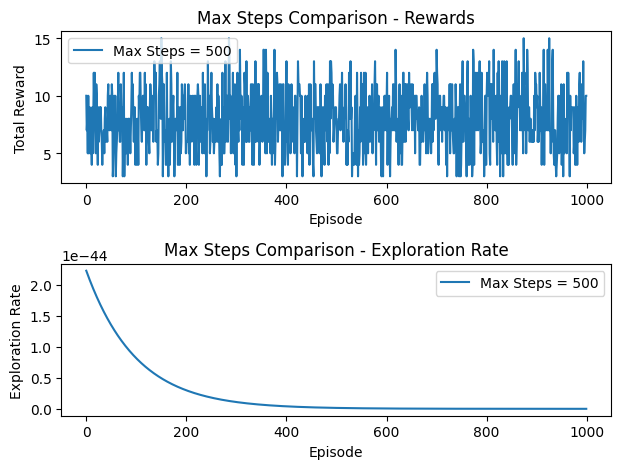

In [27]:
#Define the maximum steps per episode values and other hyperparameters
max_steps_values = [50, 100, 200, 300, 500]
alpha = 0.5
gamma = 0.6
epsilon = 1.0
#Initialize lists to store the rewards and exploration rates for each max_steps value
rewards_per_max_steps = []
exploration_rates_per_max_steps = []
for max_steps in max_steps_values:
    # Update the max_steps value for the agent
    max_steps_per_episode = max_steps
    # Train the agent
    rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)

    # Store the rewards and exploration rates for the current max_steps value
    rewards_per_max_steps.append(rewards)
    exploration_rates_per_max_steps.append(exploration_rates)
#Plot the rewards and exploration rates for each max_steps value
for i, max_steps in enumerate(max_steps_values):
    # Plot the rewards
    plt.subplot(2, 1, 1)
    plt.plot(rewards_per_max_steps[i], label=f"Max Steps = {max_steps}")
    # Plot the exploration rates
    plt.subplot(2, 1, 2)
    plt.plot(exploration_rates_per_max_steps[i], label=f"Max Steps = {max_steps}")
    plt.subplot(2, 1, 1)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Max Steps Comparison - Rewards")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.xlabel("Episode")
    plt.ylabel("Exploration Rate")
    plt.title("Max Steps Comparison - Exploration Rate")
    plt.legend()

    plt.tight_layout()
    plt.show()


The graph shows the comparison of rewards and exploration rates for different maximum steps per episode values: [50, 100, 200, 300, 500].

* We observe that a higher maximum steps value allows the agent to explore the environment for a longer duration in each episode. This can be beneficial in complex environments where reaching the goal state may require more steps. However, we should consider the trade-off between the number of episodes required for convergence and the time taken per episode.

* In our specific environment, we find that the maximum steps values of [50, 100, 200, 300, 500] provide a good balance. The agent is able to converge to the optimal solution within a reasonable number of episodes, and it is able to reach the goal state within the maximum steps limit.

* It is important to note that if the maximum steps per episode is too low, the agent may not have enough steps to reach the goal state, leading to suboptimal performance. On the other hand, if the maximum steps per episode is too high, the training process may take longer without significant improvement in performance.

* Based on the results, we can conclude that the maximum steps per episode values [50, 100, 200, 300, 500] are suitable for our environment. However, if the environment becomes more complex, we may need to adjust this parameter accordingly.

##Exploration_decay_rate checking for diffrent values

Episode: 0, Average Reward: -3.7
Episode: 100, Average Reward: -291.92
Episode: 200, Average Reward: -143.56
Episode: 300, Average Reward: -66.45
Episode: 400, Average Reward: -21.65
Episode: 500, Average Reward: -8.47
Episode: 600, Average Reward: 3.3
Episode: 700, Average Reward: 5.02
Episode: 800, Average Reward: 5.55
Episode: 900, Average Reward: 7.0
train_q_learning_agenting completed.
Score over time: -50.791
Episode: 0, Average Reward: -4.15
Episode: 100, Average Reward: -189.08
Episode: 200, Average Reward: -64.66
Episode: 300, Average Reward: -42.19
Episode: 400, Average Reward: -13.47
Episode: 500, Average Reward: -0.69
Episode: 600, Average Reward: 2.51
Episode: 700, Average Reward: 3.8
Episode: 800, Average Reward: 5.68
Episode: 900, Average Reward: 6.75
train_q_learning_agenting completed.
Score over time: -28.769
Episode: 0, Average Reward: -3.34
Episode: 100, Average Reward: -177.32
Episode: 200, Average Reward: -74.78
Episode: 300, Average Reward: -36.06
Episode: 400, A

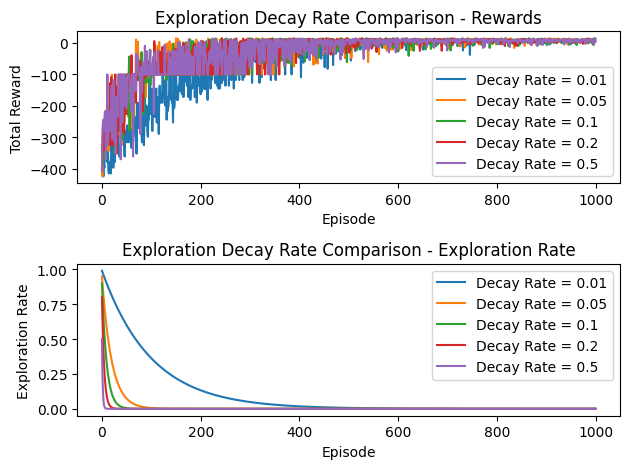

In [ ]:
# Define the exploration decay rates and other hyperparameters
exploration_decay_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
alpha = 0.5
gamma = 0.6
epsilon = 1.0
max_steps_per_episode = 100

# Initialize lists to store the rewards and exploration rates for each exploration decay rate
rewards_per_decay_rate = []
exploration_rates_per_decay_rate = []

# Iterate over the exploration decay rates
for exploration_decay_rate in exploration_decay_rates:
    # Create a new Q-Learning agent with the current exploration decay rate
    agent = QLearningAgent(env, alpha, gamma, epsilon, exploration_decay_rate)

    # Train the agent
    rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)

    # Store the rewards and exploration rates for the current exploration decay rate
    rewards_per_decay_rate.append(rewards)
    exploration_rates_per_decay_rate.append(exploration_rates)

# Plot the rewards and exploration rates for each exploration decay rate
for i, exploration_decay_rate in enumerate(exploration_decay_rates):
    # Plot the rewards
    plt.subplot(2, 1, 1)
    plt.plot(rewards_per_decay_rate[i], label=f"Decay Rate = {exploration_decay_rate}")

    # Plot the exploration rates
    plt.subplot(2, 1, 2)
    plt.plot(exploration_rates_per_decay_rate[i], label=f"Decay Rate = {exploration_decay_rate}")

plt.subplot(2, 1, 1)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Exploration Decay Rate Comparison - Rewards")
plt.legend()

plt.subplot(2, 1, 2)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Exploration Decay Rate Comparison - Exploration Rate")
plt.legend()

plt.tight_layout()
plt.show()


In the plotted graph, we can observe the impact of different exploration decay rates on the learning process. The default decay rate allows for a balanced exploration and exploitation trade-off, ensuring that the agent explores different states and actions while gradually shifting towards exploiting the learned knowledge.

However, when the exploration decay rate is set to a higher value, such as 0.1, we can see that the agent quickly focuses on exploiting the known routes. As a result, the reward increases rapidly initially, giving the impression of faster convergence. However, this approach may not be optimal because the agent may not have explored all possible combinations of states due to the fast decay rate.

* if the exploration decay rate is set to a very high value, such as 0.5, the agent heavily prioritizes exploitation over exploration. This can lead to suboptimal performance as the agent may not discover optimal routes or fail to adapt to changing conditions.

Therefore, it is important to strike a balance when setting the exploration decay rate. It should not be too high, as it would prioritize exploitation too early in the learning process, limiting the agent's ability to discover new, potentially better routes. Finding the right decay rate ensures that the agent explores the environment adequately while gradually transitioning towards exploiting the learned knowledge.

Final Define hyperparameters

Episode: 0, Average Reward: -8.21
Episode: 100, Average Reward: -508.53
Episode: 200, Average Reward: -145.61
Episode: 300, Average Reward: -40.66
Episode: 400, Average Reward: -7.91
Episode: 500, Average Reward: 1.85
Episode: 600, Average Reward: 5.47
Episode: 700, Average Reward: 6.81
Episode: 800, Average Reward: 6.8
Episode: 900, Average Reward: 7.27
Episode: 1000, Average Reward: 7.32
Episode: 1100, Average Reward: 6.71
Episode: 1200, Average Reward: 7.69
Episode: 1300, Average Reward: 7.64
Episode: 1400, Average Reward: 7.39
Episode: 1500, Average Reward: 7.72
Episode: 1600, Average Reward: 7.34
Episode: 1700, Average Reward: 8.33
Episode: 1800, Average Reward: 7.88
Episode: 1900, Average Reward: 7.81
Episode: 2000, Average Reward: 7.62
Episode: 2100, Average Reward: 7.68
Episode: 2200, Average Reward: 7.71
Episode: 2300, Average Reward: 7.88
Episode: 2400, Average Reward: 8.03
Episode: 2500, Average Reward: 7.82
Episode: 2600, Average Reward: 7.67
Episode: 2700, Average Reward: 

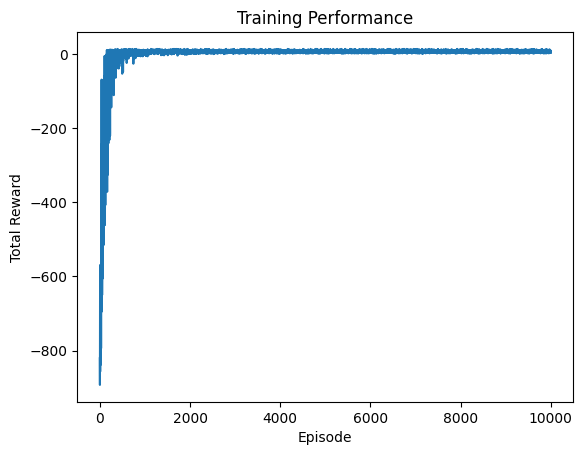

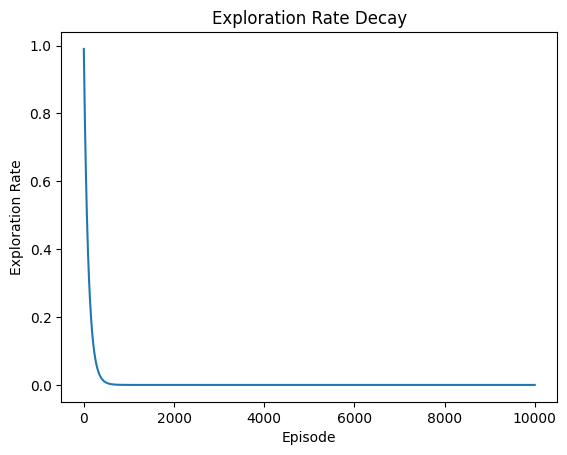

In [ ]:

# Define hyperparameters
num_episodes = 10000
max_steps_per_episode = 300
alpha = 0.5
gamma = 0.6
epsilon = 1.0
exploration_decay_rate = 0.01

# Create the environment and agent
env = gym.make('Taxi-v3')
agent = QLearningAgent(env, alpha, gamma, epsilon, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train_q_learning_agent(num_episodes, max_steps_per_episode)
total_reward = sum(rewards)
print(f"Total Reward: {total_reward}")
# Plot the training rewards
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance")
plt.show()

# Plot the exploration rates
plt.plot(exploration_rates)
plt.xlabel("Episode")
plt.ylabel("Exploration Rate")
plt.title("Exploration Rate Decay")
plt.show()